In [2]:
import random
import nltk, re, pprint
from nltk import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np
import seaborn as sns
import itertools
import math
from wordcloud import WordCloud, ImageColorGenerator
sns.set()
#nltk.download('punkt')

In [3]:
# Books source: http://www.glozman.com/textpages.html
# Book 2 source: https://github.com/formcept/whiteboard/blob/master/nbviewer/notebooks/data/harrypotter/Book%202%20-%20The%20Chamber%20of%20Secrets.txt

# Create a lemmatization object to use and stopwords
stopwords = nltk.corpus.stopwords.words('english')
wnl = nltk.WordNetLemmatizer()

# Initialize the datastructure to store all the information
books = []
text_from_all_books = """"""
clean_text_from_all_books = []

# Gather the filenames needed for the analysis
booknames = [
    "Harry Potter 1 - Sorcerer's Stone FIXED.txt",
    "Harry Potter 2 - Chamber of Secrets - FIXED.txt",
    "Harry Potter 3 - The Prisoner Of Azkaban - FIXED.txt",
    "Harry Potter 4 - The Goblet Of Fire - FIXED.txt",
    "Harry Potter 5 - Order of the Phoenix - FIXED.txt",
    "Harry Potter 6 - The Half Blood Prince - FIXED.txt",
    "Harry Potter 7 - Deathly Hollows - FIXED.txt"
]

# Loop through each book 
for idx, name in enumerate(booknames):

    # Generate a new book dictionary
    book = {
        'title' : "",
        'book_nr' : idx+1,
        'nr_chapters' : 0,
        'chapters' : [],
        'all_text' : """""",
        'all_text_clean' : [],
        'all_text_clean_length' : 0
    }

    f = open(name, encoding="utf-8", errors='ignore')         # Open the file
    lines = f.readlines()                                     # Read all the lines
    lines = [line.rstrip() for line in lines if line != '\n'] # Skip empty rows and remove whitespace from the end

    # The first line contains the title of the book
    book['title'] = lines[0]

    # Find all the indexes where chapters start and the final one where the book ends
    chapter_starts_indexes = [lines.index(l) for l in lines if l.startswith('CHAPTER')]
    the_end_index = [lines.index(l) for l in lines if l.startswith('THE END')][0]

    # Extract the text and information about each chapter
    for i in range(len(chapter_starts_indexes)):

        chapter = {
            'chapter_name' : '',
            'chapter_text' : """""",
            'chapter_text_clean' : []
        }

        # increase the chapter count
        book['nr_chapters'] += 1

        # extract the chapter name
        chapter['chapter_name'] = lines[chapter_starts_indexes[i]+1]

        # If it is not the last chapter
        if i < len(chapter_starts_indexes)-1: 
            # Use a simple slice to select the lines of the text.
            text = lines[chapter_starts_indexes[i]+2:chapter_starts_indexes[i+1]]  
        else:
            # Get all the text for the index slice until the end index
            text = lines[chapter_starts_indexes[i]+2:the_end_index] 

        # Clean up the text and merge it into a single string
        text = ' '.join(str(t) for t in text)
        text = text.replace('- ', '')
        text = text.replace('-', '')
        chapter['chapter_text'] = text # Add the text to the dictionary

        # Tokenize the words, make everything lowercase and skip punctuation and common stopwords
        tokens = nltk.word_tokenize(text)
        words = [w.lower() for w in tokens if w.isalpha()]
        lem_words = [wnl.lemmatize(w) for w in words if w not in stopwords]  # Lemmatize the words and skip stopwords

        # Add the lemmetized information 
        chapter['chapter_text_clean'] = lem_words

        # Add the information to the dictionary
        book['chapters'].append(chapter)
        book['all_text'] = book['all_text'] + text
        book['all_text_clean'].extend(lem_words)
        

    # Add the book to the list of books
    book['all_text_clean_length'] = len(book['all_text_clean'])
    
    # Finally append the book to the books list
    books.append(book)

    # Append the text to the string containing all the books
    text_from_all_books = text_from_all_books + text
    clean_text_from_all_books.extend(book['all_text_clean'])

After this first round we have all the text of the first book contained within a single dictionary

In [4]:
for i in range(len(books)):
    print("Book number: ", books[i]['book_nr'])
    print("Book name: ", books[i]['title'])
    print("Number of chapters: ", books[i]['nr_chapters'])
    print("Number of word objects after clean-up: ", books[i]['all_text_clean_length'])
    print("Number of unique words (clean): ", len(set(books[i]['all_text_clean'])), "\n")

Book number:  1
Book name:  Harry Potter and the Sorcerer's Stone
Number of chapters:  17
Number of word objects after clean-up:  40502
Number of unique words (clean):  5200 

Book number:  2
Book name:  Harry Potter and the Chamber of Secrets
Number of chapters:  17
Number of word objects after clean-up:  45390
Number of unique words (clean):  6281 

Book number:  3
Book name:  Harry Potter and the Prisoner Of Azkaban
Number of chapters:  22
Number of word objects after clean-up:  56141
Number of unique words (clean):  6761 

Book number:  4
Book name:  Harry Potter and the Goblet of Fire
Number of chapters:  37
Number of word objects after clean-up:  100091
Number of unique words (clean):  9421 

Book number:  5
Book name:  Harry Potter and the Order of the Phoenix
Number of chapters:  38
Number of word objects after clean-up:  138570
Number of unique words (clean):  11511 

Book number:  6
Book name:  Harry Potter and the Half Blood Prince
Number of chapters:  29
Number of word obje

In [5]:
# Generate the data needed for the bar plots
names = [books[i]['title'] for i in range(len(books))]
names_short = [books[i]['title'].split("Harry Potter and the ", 1)[1] for i in range(len(books))]

nr_chapters = [books[i]['nr_chapters'] for i in range(len(books))]
word_count = [books[i]['all_text_clean_length'] for i in range(len(books))]
unique_word_count = [len(set(books[i]['all_text_clean'])) for i in range(len(books))]
unique_word_count_ratio = [len(set(books[i]['all_text_clean']))/books[i]['all_text_clean_length'] for i in range(len(books))]

/Users/kristin/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:132: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.canvas.print_figure(bytes_io, **kw)


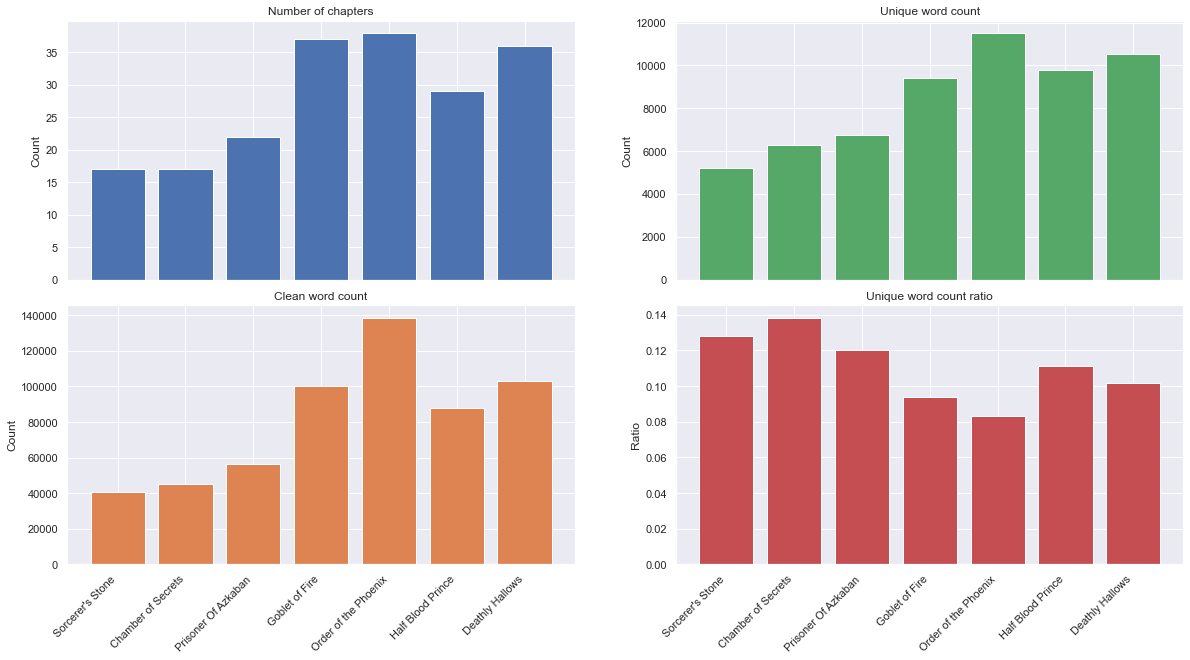

In [6]:
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(20,10), gridspec_kw={'hspace': 0.1})

palette = itertools.cycle(sns.color_palette())

axes[0][0].bar(names_short, nr_chapters, width = 0.8, color=next(palette))
axes[0][0].set_title('Number of chapters')
axes[0][0].set_ylabel('Count')

axes[1][0].bar(names_short, word_count, width = 0.8, color=next(palette))
axes[1][0].set_title('Clean word count')
axes[1][0].set_ylabel('Count')

axes[0][1].bar(names_short, unique_word_count, width = 0.8, color=next(palette))
axes[0][1].set_title('Unique word count')
axes[0][1].set_ylabel('Count')

axes[1][1].bar(names_short, unique_word_count_ratio, width = 0.8, color=next(palette))
axes[1][1].set_title('Unique word count ratio')
axes[1][1].set_ylabel('Ratio')

fig.set_tight_layout(True)

# Set the rotation and horizontal alignment of the x tick labels
plt.setp(axes[1][0].get_xticklabels(), rotation=45, ha="right");
plt.setp(axes[1][1].get_xticklabels(), rotation=45, ha="right");

In [7]:
# Convert the text into a nltk Text object so that further analysis can be done
text = nltk.Text(nltk.word_tokenize(book['all_text']))
text_clean = nltk.Text(book['all_text_clean'])
text_clean_all = nltk.Text(clean_text_from_all_books)

In [8]:
#text.common_contexts(["Harry"])

In [9]:
#text_clean.common_contexts(["mother"])

In [10]:
#plt.figure(figsize=(15,7))
#text.dispersion_plot(["Harry", "Dursley", "Dumbledore", "McGonagall", "Ron", "Hermione", "Hagrid", "Quirrell", 'Hogwarts'])

In [11]:
#plt.figure(figsize=(15,7))
#text_clean.dispersion_plot(["harry", "dursley", "dumbledore", "mcgonagall", "ron", "hermione", "hagrid", "quirrell", "snape",'hogwarts', 'eye'])

In [12]:
#fig, ax = plt.subplots(figsize=(15,7))

#text_clean_all.dispersion_plot(["harry", "horcrux", "dobby", "sirius", "lord", "hewhomustnotbenamed", "voldemort", "dursley", "dumbledore", "mcgonagall", "ron", "hermione", "hagrid", "quirrell", "snape",'hogwarts', 'eye', "draco"])

#ax.axvline(x=10000, ymin = 0, ymax = 100, color='r')
#plt.vlines(x=100000, colors='k', ymin=0, ymax = 100) 

#plt.show()

In [13]:
# To be able to generate the vertical lines to indicate where each book starts, we need to modify the dispersion_plot
# from the nltk package

def dispersion_plot_w_hlines(text, words, vlines, ignore_case=False, title="Lexical Dispersion Plot"):
    """
    Generate a lexical dispersion plot.

    :param text: The source text
    :type text: list(str) or enum(str)
    :param words: The target words
    :type words: list of str
    :param ignore_case: flag to set if case should be ignored when searching text
    :type ignore_case: bool
    """

    try:
        from matplotlib import pylab
    except ImportError:
        raise ValueError(
            "The plot function requires matplotlib to be installed."
            "See http://matplotlib.org/"
        )

    text = list(text)
    words.reverse()

    if ignore_case:
        words_to_comp = list(map(str.lower, words))
        text_to_comp = list(map(str.lower, text))
    else:
        words_to_comp = words
        text_to_comp = text

    points = [
        (x, y)
        for x in range(len(text_to_comp))
        for y in range(len(words_to_comp))
        if text_to_comp[x] == words_to_comp[y]
    ]
    if points:
        x, y = list(zip(*points))
    else:
        x = y = ()
    pylab.plot(x, y, "b|", scalex=0.1)
    pylab.yticks(list(range(len(words))), words, color="b")
    pylab.ylim(-1, len(words))
    pylab.title(title)
    pylab.xlabel("Word Offset")
    ax.grid(False)
    
    for v in vlines:
        plt.axvline(x=v, alpha = 0.3, color='r')
    
    pylab.show()

In [14]:
# Generate the positions to use for the vertical line should be in the plot
vlines_books = []
for book in books:
    vlines_books.append(book['all_text_clean_length']) 
vlines_books = np.cumsum(vlines_books)

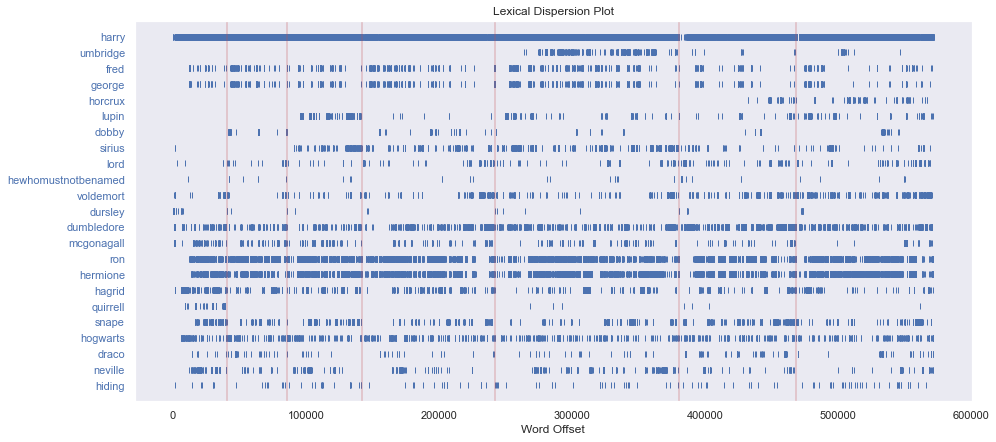

In [15]:
fig, ax = plt.subplots(figsize=(15,7))
dispersion_plot_w_hlines(text_clean_all, ["harry", "umbridge", "fred", "george", "horcrux", "lupin", "dobby", "sirius", "lord", "hewhomustnotbenamed", "voldemort", "dursley", "dumbledore", "mcgonagall", "ron", "hermione", "hagrid", "quirrell", "snape",'hogwarts', "draco", "neville", "hiding"], vlines_books[:-1])

In [16]:
fdist = nltk.FreqDist(text)
fdist_clean = nltk.FreqDist(text_clean)
fidst_all_text_clean = nltk.FreqDist(clean_text_from_all_books)
#fdist.most_common(50)
text_clean.collocations()

death eater; said harry; said ron; invisibility cloak; godrics hollow;
said hermione; professor mcgonagall; ron hermione; elder wand; phineas
nigellus; uncle vernon; deathly hallows; dark lord; beaded bag; auntie
muriel; fred george; could see; rita skeeter; shook head; harry potter


In [17]:
def generate_model(cfdist, word, length = 15, num = 10):
    for i in range(length):
        print(word, end = ' ') # Print the word
        # word = cfdist[word].max() # Instead of using the max word we use a randomly generate from the top words
        word = random.choice(cfd[word].most_common(num))[0]
        
bigrams = nltk.bigrams(text) # text
cfd = nltk.ConditionalFreqDist(bigrams)

In [18]:
fidst_all_text_clean['hewhomustnotbenamed']

45

In [19]:
random.choice(cfd["Harry"].most_common(10))[0]

'Potter'

In [20]:
generate_model(cfd, 'Harry', 100, 15)

Harry and Harry saw her voice echoed out and it , his mouth opened and it 's eyes and saw , he thought , who looked a lot that I 've they ? Harry felt the air ; and the way and his mouth had never really `` No no more like . Harry saw them ; she cried the place . '' `` But when Ron ! But my parents house of you have it ! But what looked at it 's , it . He pulled . He knew what happened since I had happened after her head 

In [21]:
#fdist_clean.most_common(20)

In [22]:
fdist_clean_norm = copy.deepcopy(fdist_clean)

length = sum(fdist.values())

for word in fdist_clean_norm:
    fdist_clean_norm[word] = fdist_clean[word] / length

#fdist_clean_norm.most_common(20)

In [23]:
#nltk.pos_tag(text_clean)

In [24]:
nouns = [token[0] for token in nltk.pos_tag(text_clean) if token[1] in ['NN']]
frequency = nltk.FreqDist(nouns)
#frequency.most_common(10)

In [25]:
verbs = [token[0] for token in nltk.pos_tag(text_clean) if token[1] in ['VBP']]
frequency_verbs = nltk.FreqDist(verbs)
#frequency_verbs.most_common(10)

# Most common word

In [26]:
# Generate nltk text objects and compute frequency distribution and normalixed frequency distribution
for book in books:

    # generate the text object needed to compute frequencies
    nltk_text = nltk.Text(book['all_text_clean'])
    
    # Generate the frequency distribution
    fdist = nltk.FreqDist(nltk_text)
    
    # Assign them to each book dictionary
    book['fdist'] = fdist
    
    # generate the normalized frequencies - here normalized by the length of the clean text
    fdist_norm = copy.deepcopy(fdist)
    
    # Extract the length of the clean text
    length = book['all_text_clean_length']
    
    # Loop through each word and divide the frequency with the length of the document
    for word in fdist_norm:
        fdist_norm[word] = fdist[word] / length

    # Assign the normalized frequency distribution to the dictionaries of books
    book['fdist_norm'] = fdist_norm
    
    # Then we will also create a fdist for each chapter as well
    for chapter in book['chapters']:
        nltk_text_chapter = nltk.Text(chapter['chapter_text_clean'])
        fdist_chapter = nltk.FreqDist(nltk_text_chapter)
        chapter['fdist'] = fdist_chapter

In [27]:
books[0]['chapters'][0]['fdist']

FreqDist({'dursley': 47, 'dumbledore': 37, 'said': 32, 'professor': 30, 'could': 27, 'mcgonagall': 26, 'cat': 22, 'people': 21, 'potter': 21, 'harry': 20, ...})

In [28]:
books[0]['fdist_norm'].most_common(10)

[('harry', 0.03271443385511827),
 ('said', 0.01960397017431238),
 ('ron', 0.010592069527430744),
 ('hagrid', 0.009110661201915955),
 ('could', 0.007481112043849687),
 ('hermione', 0.006666337464816552),
 ('one', 0.006567576909782233),
 ('back', 0.006518196632265073),
 ('know', 0.005160239000543183),
 ('got', 0.005086168584267444)]

In [29]:
books[1]['fdist_norm'].most_common(10)

[('harry', 0.036373650583829034),
 ('said', 0.026812073143864287),
 ('ron', 0.015510024234412867),
 ('hermione', 0.00702797973121833),
 ('back', 0.0061467283542630535),
 ('lockhart', 0.005133289270764486),
 ('one', 0.004912976426525667),
 ('malfoy', 0.0048689138576779025),
 ('could', 0.004648601013439084),
 ('professor', 0.004252037893809209)]

In [30]:
# Collect all the top 10 most common words in each book into a set
most_common_words = []

for i in range(len(books)):
    terms = [term for (term, freq) in books[i]['fdist_norm'].most_common(10)]
    most_common_words.extend(terms)

word_set = list(set(most_common_words))

# Collect the total relative frequency of each word so that the order can be defined
word_set_freq = []
for word in word_set:
    word_freq = 0
    for i in range(len(books)):
        word_freq += books[i]['fdist_norm'][word]
    word_set_freq.append(word_freq)

# create a list of the correctly sorted elements
word_set_sorted = list(np.array(word_set)[np.argsort(word_set_freq).astype(int)])

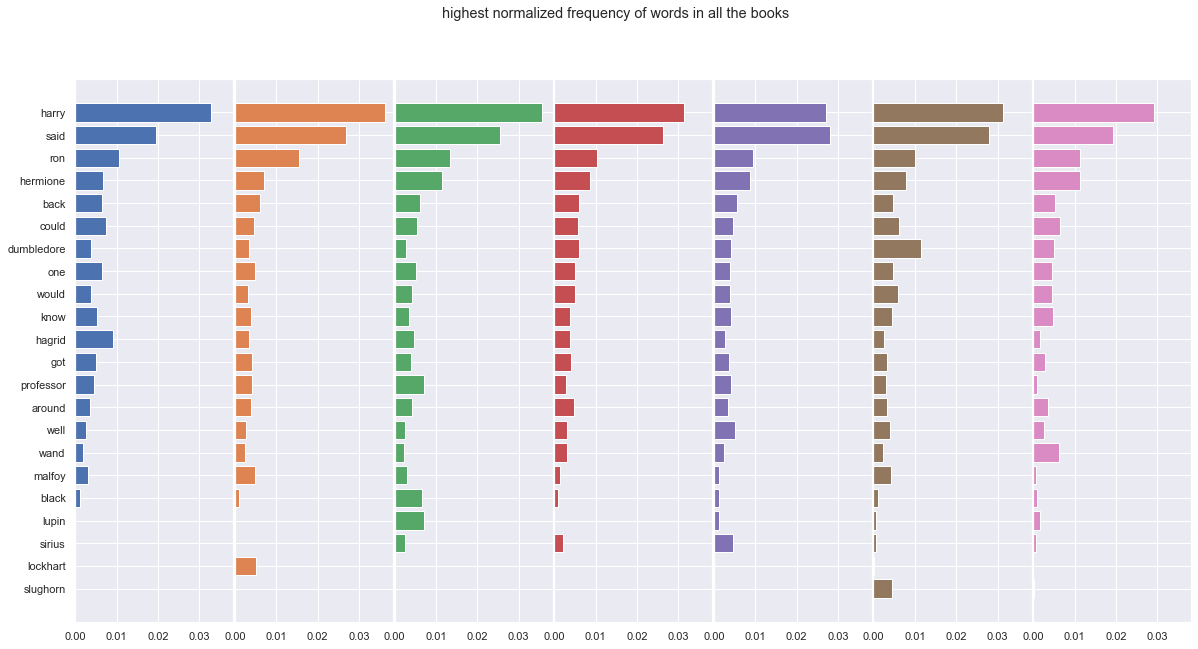

In [31]:
fig, axes = plt.subplots(1, 7, sharey=True, sharex=True, figsize=(20,10), gridspec_kw={'wspace':0.01, 'hspace':0.01}, squeeze=True)

palette = itertools.cycle(sns.color_palette())

for i in range(7):

    height = []

    for word in word_set_sorted:
        height.append(books[i]['fdist_norm'][word])

    # Create the list of bars for the plot
    bars = word_set_sorted

    y_pos = np.arange(len(bars))

    # Create horizontal bars
    axes[i].barh(y_pos, height, color=next(palette))
    
axes[i]
fig.set_tight_layout(True)

# Create names on the y-axis
plt.yticks(np.arange(len(bars)), word_set_sorted);
fig.suptitle('highest normalized frequency of words in all the books');
# Set the rotation and horizontal alignment of the x tick labels
#plt.setp(axes[1][0].get_xticklabels(), rotation=45, ha="right");
#plt.setp(axes[1][1].get_xticklabels(), rotation=45, ha="right");

# TF-all books

In [34]:
nltk_all_books = nltk.Text(clean_text_from_all_books)
fdist_all_books = nltk.FreqDist(nltk_all_books)
fdist_all_books.most_common(15)

[('harry', 17619),
 ('said', 14411),
 ('ron', 6286),
 ('hermione', 5165),
 ('could', 3233),
 ('back', 3231),
 ('dumbledore', 3159),
 ('one', 2697),
 ('would', 2564),
 ('know', 2454),
 ('like', 2406),
 ('looked', 2345),
 ('around', 2187),
 ('got', 2109),
 ('well', 2024)]

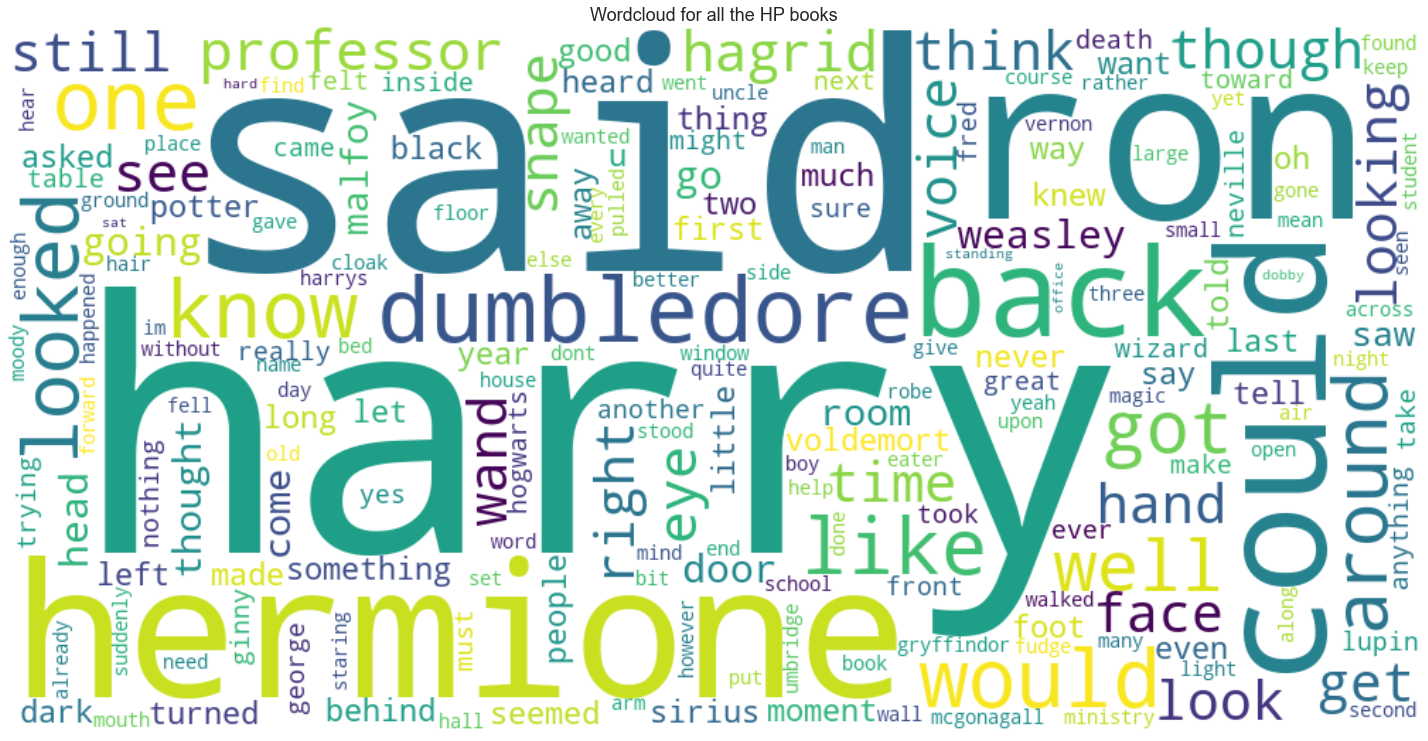

In [35]:
# Define the settings and input to the wordclouds - DC
wordcloud_all_books = WordCloud(background_color='White',   
                         width=1000, 
                         height=500, 
                         colormap="viridis"
                        ).generate_from_frequencies(fdist_all_books)

plt.figure(figsize=(20,15))

plt.imshow(wordcloud_all_books, interpolation='bilinear')
plt.title("Wordcloud for all the HP books", fontsize=18)
plt.axis("off")
plt.tight_layout()

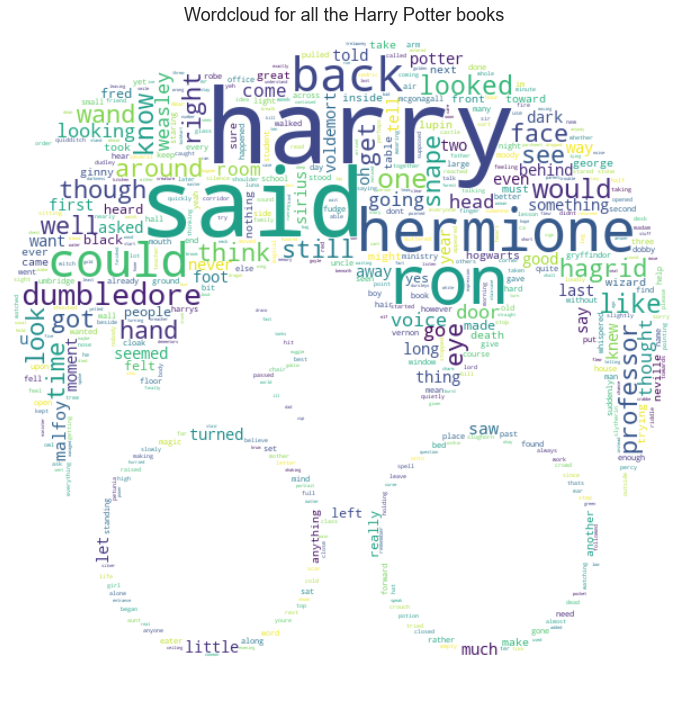

In [43]:
from os import path
from PIL import Image
import os

# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
hp_mask = np.array(Image.open(path.join(d, "hp_haus.jpg")))

# Define the settings and input to the wordclouds - DC
wordcloud_all_books = WordCloud(background_color='white',   
                         width=1000,
                         max_words=2000,
                         height=1000, 
                         colormap="viridis",
                         mask = hp_mask,
                         random_state = 42
                         #contour_width=1, 
                         #contour_color='steelblue'
                        ).generate_from_frequencies(fdist_all_books)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud_all_books, interpolation='bilinear')
plt.title("Wordcloud for all the Harry Potter books", fontsize=18)
plt.axis("off")
plt.tight_layout()

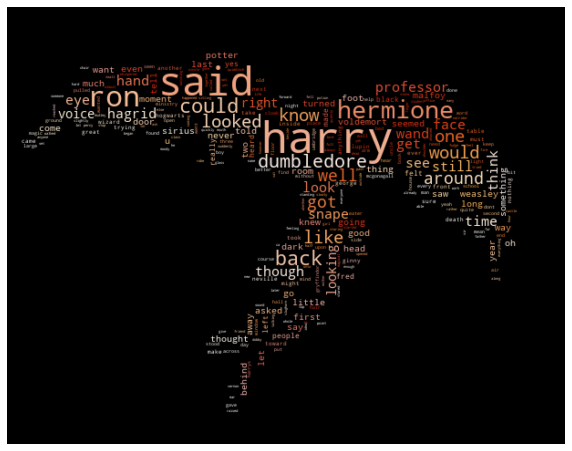

In [38]:
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

## image from PublicDomainPictures.net
## http://www.publicdomainpictures.net/view-image.php?image=232185&picture=family-gathering
mask = np.array(Image.open(path.join(d, "phenix.jpg")))

wc = WordCloud(background_color="black", max_words=1000, mask=mask,
               max_font_size=90, random_state=42).generate_from_frequencies(fdist_all_books)

# create coloring from image
image_colors = ImageColorGenerator(mask)

plt.figure(figsize=[10,10])

plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")

plt.axis("off")

_=plt.show()

In [ ]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
hp_mask = np.array(Image.open(path.join(d, "deathlyhallows2.jpg")))

# Define the settings and input to the wordclouds - DC
wordcloud_all_books = WordCloud(background_color='black',   
                         width=1000,
                         max_words=2000,
                         height=500, 
                         colormap="viridis",
                         mask = hp_mask#,
                         #contour_width=1, 
                         #contour_color='steelblue'
                        ).generate_from_frequencies(fdist_all_book)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud_all_books, interpolation='bilinear')
plt.title("Wordcloud for all the HP books", fontsize=18)
plt.axis("off")
plt.tight_layout()

In [ ]:
# get data directory (using getcwd() is needed to support running example in generated IPython notebook)
d = path.dirname(__file__) if "__file__" in locals() else os.getcwd()

# read the mask image
# taken from
# http://www.stencilry.org/stencils/movies/alice%20in%20wonderland/255fk.jpg
hp_mask = np.array(Image.open(path.join(d, "hp_logo.jpg")))

# Define the settings and input to the wordclouds - DC
wordcloud_all_books = WordCloud(background_color='black',   
                         width=1000,
                         max_words=2000,
                         height=500, 
                         colormap="viridis",
                         mask = hp_mask#,
                         #contour_width=1, 
                         #contour_color='steelblue'
                        ).generate_from_frequencies(fdist_all_book)

plt.figure(figsize=(10,10))

plt.imshow(wordcloud_all_books, interpolation='bilinear')
plt.title("Wordcloud for all the HP books", fontsize=18)
plt.axis("off")
plt.tight_layout()

# TF-IDF
Now we create the TF-IDF for each book in the series.


In [357]:
# Create a copy where we will overwrite the values to include the tf-idf in each book

# Loop through each book
for book in books:
    tf_idf = copy.deepcopy(book['fdist_norm'])
    
    for word in book['fdist_norm']:
        doc_count = 0 # reset doc count
        
        for inner_book in books: # Loop through all the documents again
            if word in inner_book['fdist_norm'].keys(): # if the word is a key in the inner books
                doc_count = doc_count + 1 # increase the doc count
        tf_idf[word] = tf_idf[word] * (math.log(7 / (doc_count+1)))
        
    # add the tf_idf to the dictionary of the book
    book['tf_idf'] = tf_idf

In [358]:
books[0]['tf_idf']

FreqDist({'quirrell': 0.0009304451755857944, 'flamel': 0.000564837347055812, 'mom': 0.0003974781331133492, 'pier': 0.00033471842788492564, 'nicolas': 0.0003137985261421178, 'turban': 0.0002928786243993099, 'ronan': 0.0002763398291123513, 'griphook': 0.0002510388209136942, 'chessman': 0.000247447132190088, 'ca': 0.00023597210382919406, ...})

In [372]:
# Collect the word cloud objects into a dictionary
wordclouds = {}

for idx, book in enumerate(books):
    
    color_maps = ["viridis", "plasma", "inferno", "magma", "cividis"]
    
    random_color_map = random.choice(color_maps)
    
    wordclouds[idx] = WordCloud(collocations=False, 
                                             background_color='White', 
                                             width=800, 
                                             height=400, 
                                             colormap="viridis",
                                             random_state=42
                                             #stopwords = manual_stopwords  ### this does not work with generate_from_frequencies
                        ).generate_from_frequencies(book['tf_idf'])

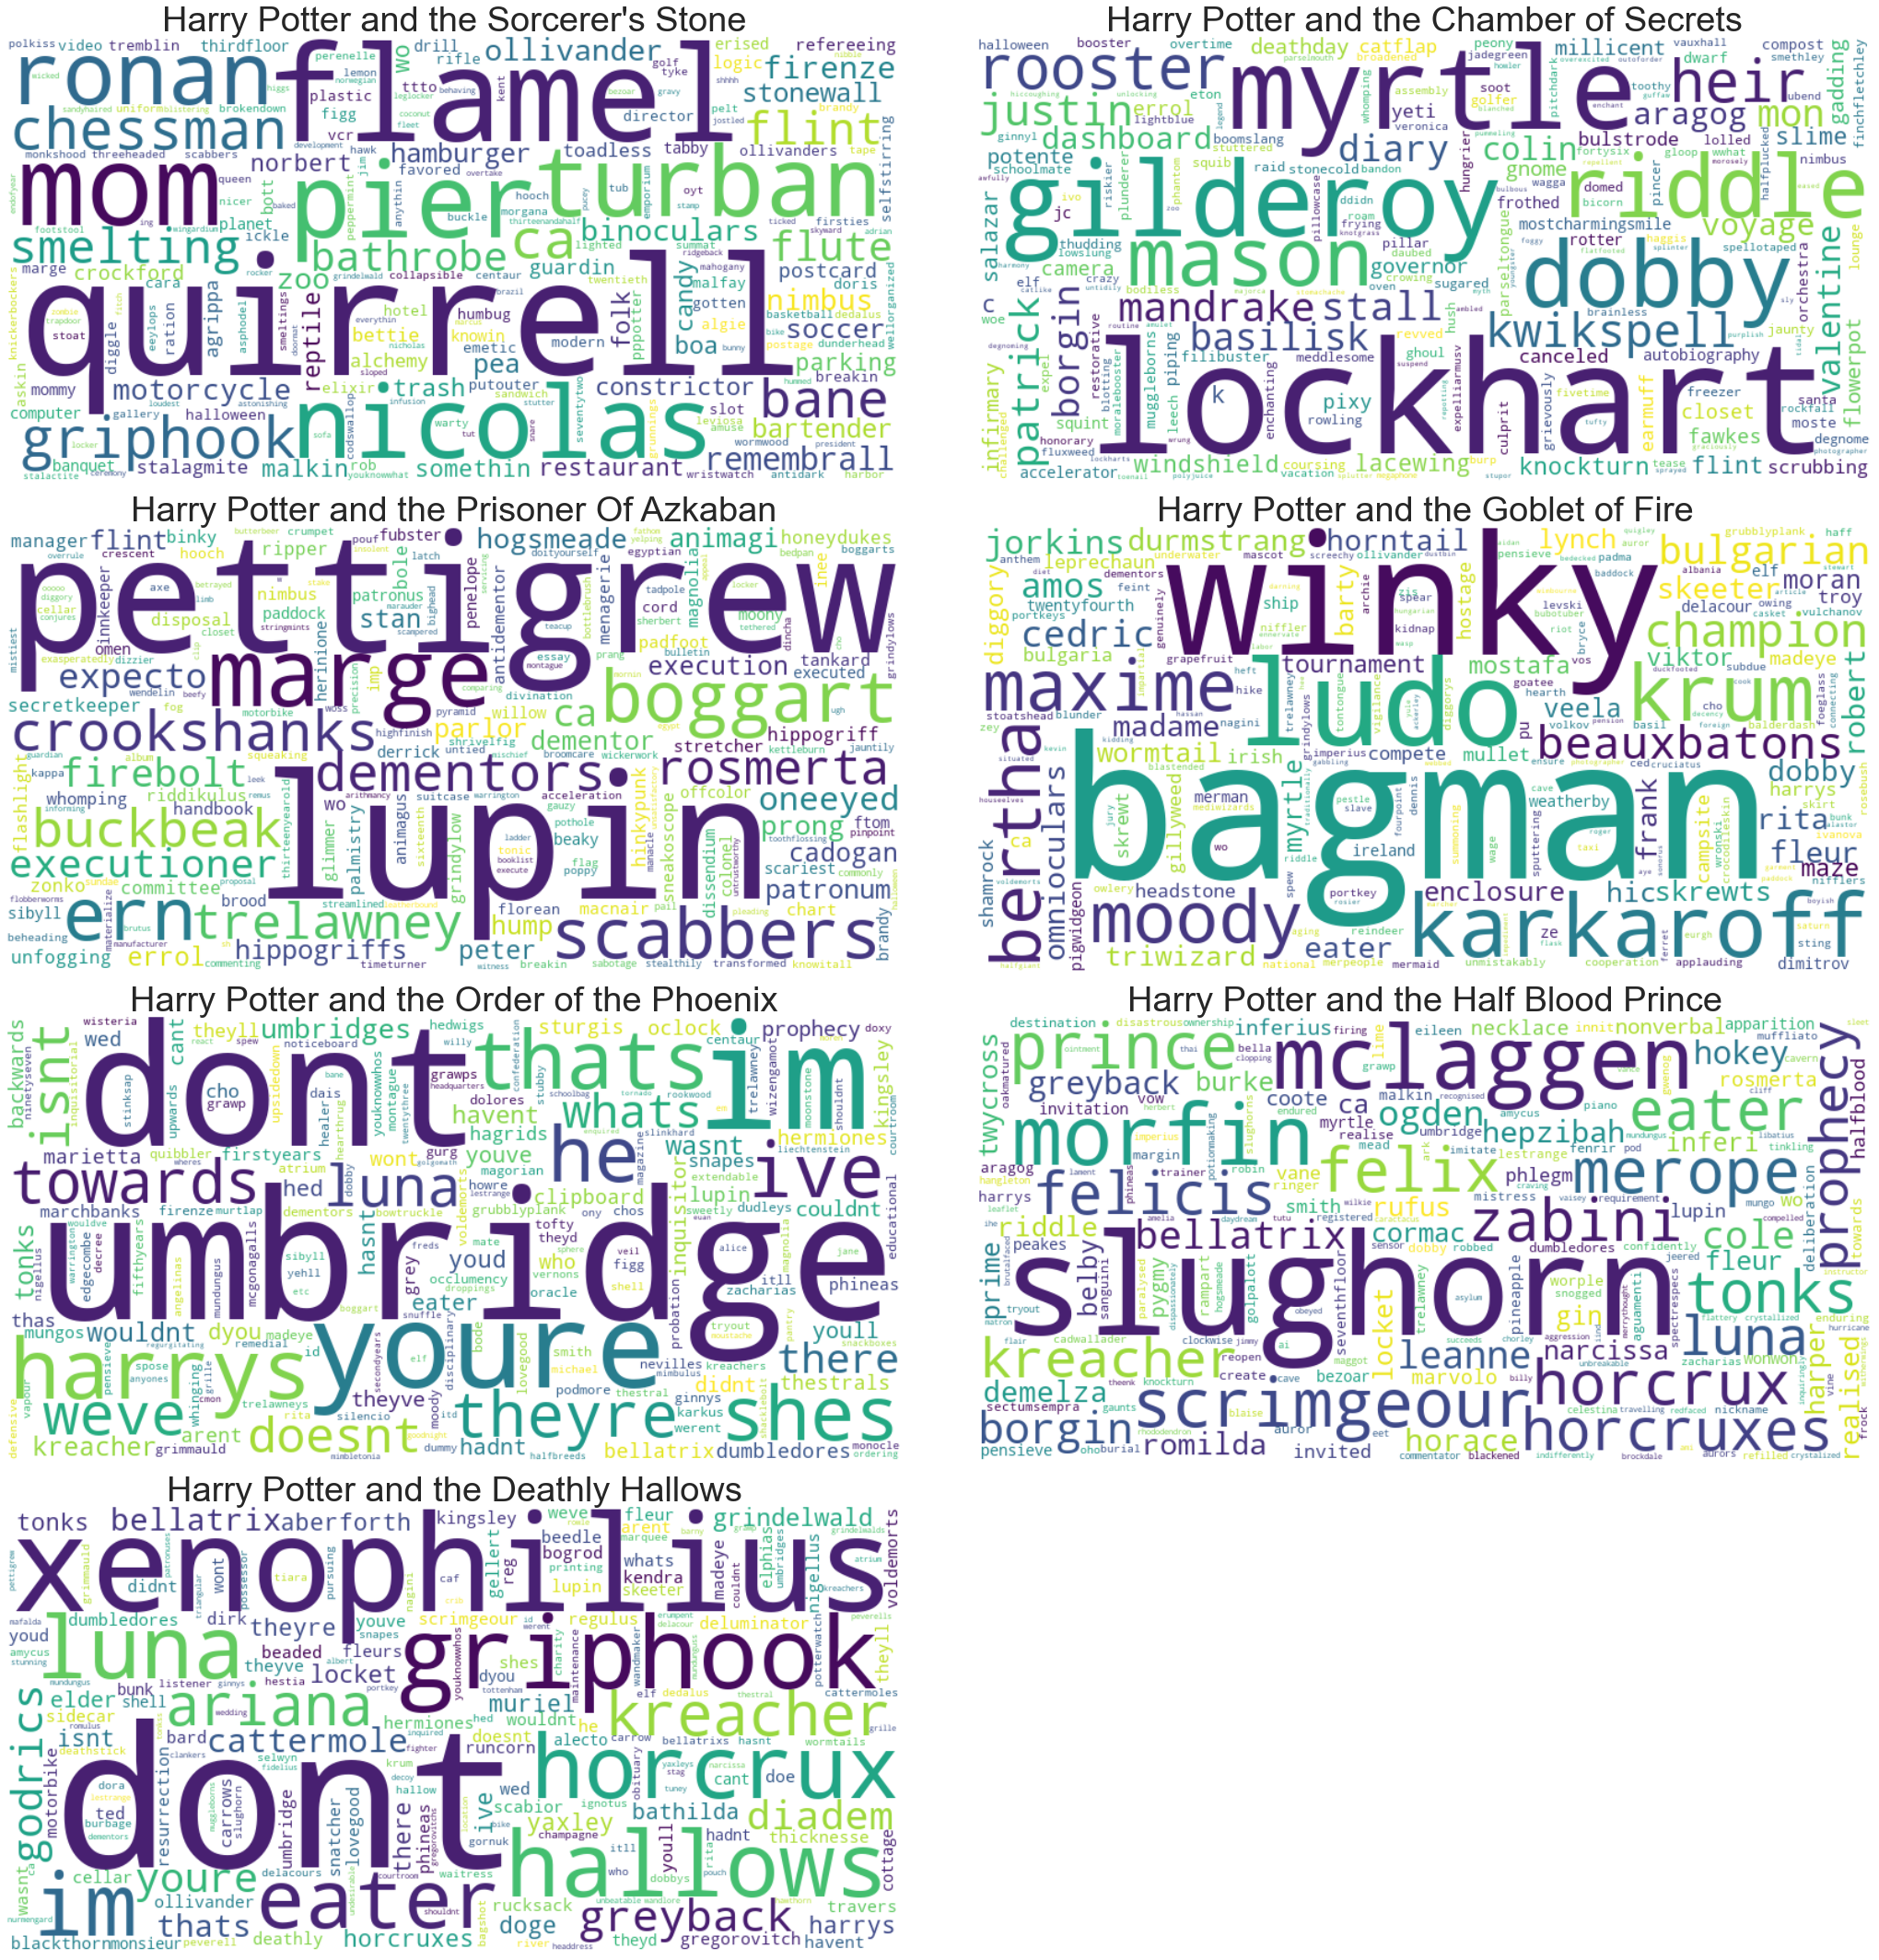

In [383]:
# Generate a single figure
plt.figure(figsize=(30,30))

for idx, community_number in enumerate(wordclouds):
    plt.subplot(4, 2, idx+1);
    plt.imshow(wordclouds[idx], interpolation='bilinear');
    plt.title(books[idx]['title'], size = 38);
    plt.tight_layout();
    plt.axis("off");

# Sentiment

In [388]:
# Load the text file into a table
word_sentiments = pd.read_csv('Data_Set_S1.txt', skiprows = 3, sep="\t")
word_sentiments.set_index('word', inplace = True)

# Convert the happiness_average into a dictinary with the word as key
w_happiness = word_sentiments['happiness_average'].to_dict()

In [395]:
books[0]['fdist']

FreqDist({'harry': 1325, 'said': 794, 'ron': 429, 'hagrid': 369, 'could': 303, 'hermione': 270, 'one': 266, 'back': 264, 'know': 209, 'got': 206, ...})

In [416]:
avg_book_happiness = []

for book in books:

    total_happiness = 0
    word_count_w_sentiment = 0
    for term in book['fdist']:
        if term in w_happiness.keys():
            total_happiness += book['fdist'][term] * w_happiness[term]
            word_count_w_sentiment += book['fdist'][term]

    avg_happiness = total_happiness / word_count_w_sentiment
    avg_book_happiness.append(avg_happiness)

In [417]:
avg_book_happiness

[5.500597131032741,
 5.454350873128478,
 5.453766477019957,
 5.484691242908141,
 5.430954898822429,
 5.470376906744554,
 5.399877282481598]

In [405]:
len(w_happiness)

10222

Text(0, 0.5, 'Sentiment')

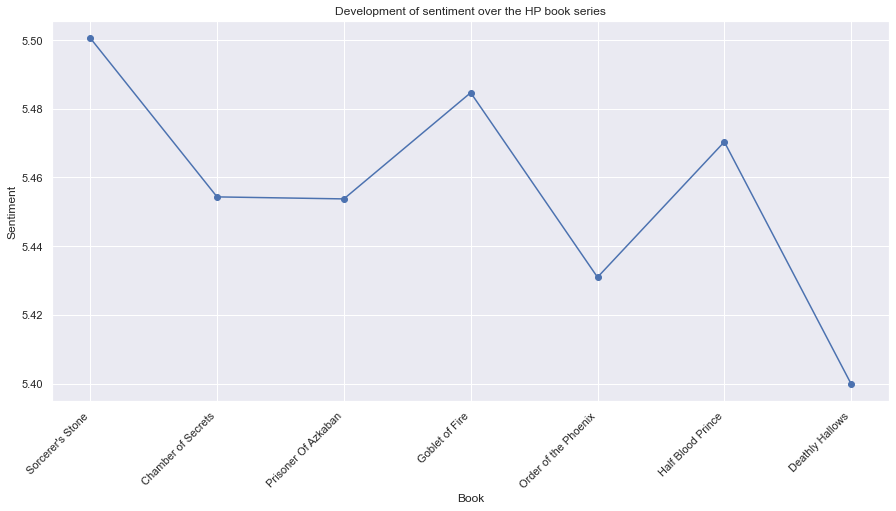

In [434]:
plt.figure(figsize=(15,7))

plt.plot(avg_book_happiness, 'o-');
plt.title('Development of sentiment over the HP book series')
plt.xlabel('Book')
plt.xticks(range(len(books)), names_short, rotation=45, ha="right")  # Set locations and labels
plt.ylabel('Sentiment')

In [485]:
avg_chapter_happiness = []
book_numbers = []

for book in books:

    for chapter in book['chapters']:
    
        total_happiness = 0
        word_count_w_sentiment = 0
        
        for term in chapter['fdist']:
            if term in w_happiness.keys():
                total_happiness += chapter['fdist'][term] * w_happiness[term]
                word_count_w_sentiment += chapter['fdist'][term]

        avg_happiness = total_happiness / word_count_w_sentiment
        avg_chapter_happiness.append(avg_happiness)
        book_numbers.append(book['book_nr'])
        
        # Add the average chapter sentiment to the dictionary
        chapter['avg_sentiment'] = avg_happiness
        

Text(0, 0.5, 'Sentiment')

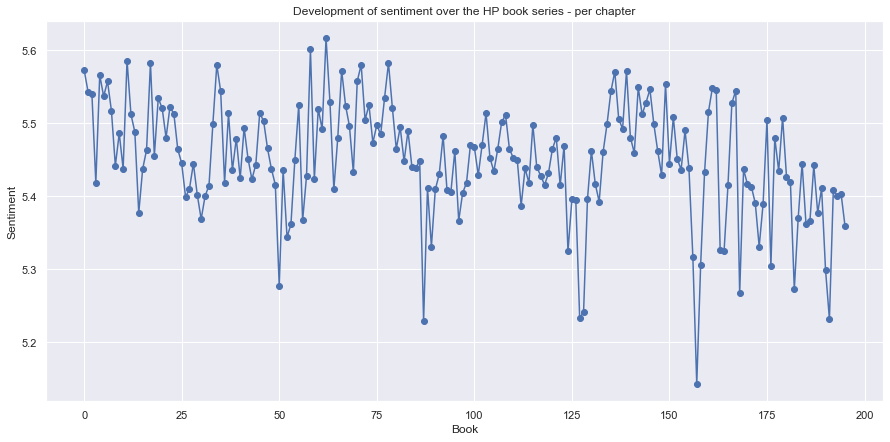

In [464]:
plt.figure(figsize=(15,7))

plt.plot(range(len(avg_chapter_happiness)), avg_chapter_happiness, 'o-');
plt.title('Development of sentiment over the HP book series - per chapter')
plt.xlabel('Book')
#plt.xticks(range(len(books)), names_short, rotation=45, ha="right")  # Set locations and labels

plt.ylabel('Sentiment')

In [482]:
books[0]['chapters'][0]['avg_sentiment']

5.572971175166306

In [516]:
df = pd.DataFrame(list(zip(list(book_numbers),list(avg_chapter_happiness), range(len(avg_chapter_happiness)))), columns=['book_numbers', 'avg_chapter_happiness', 'range'])
df

book_numbers  avg_chapter_happiness  range
0               1               5.572971      0
1               1               5.543329      1
2               1               5.539672      2
3               1               5.418323      3
4               1               5.565985      4
..            ...                    ...    ...
191             7               5.231479    191
192             7               5.408218    192
193             7               5.400258    193
194             7               5.402697    194
195             7               5.358948    195

[196 rows x 3 columns]

In [524]:
nr_chapters

[17, 17, 22, 37, 38, 29, 36]

In [533]:
a = np.arange(0, 17, 1)
a_happy = df['avg_chapter_happiness'][0:17]

b = np.arange(17,(17+17))
b_happy = df['avg_chapter_happiness'][17:34]


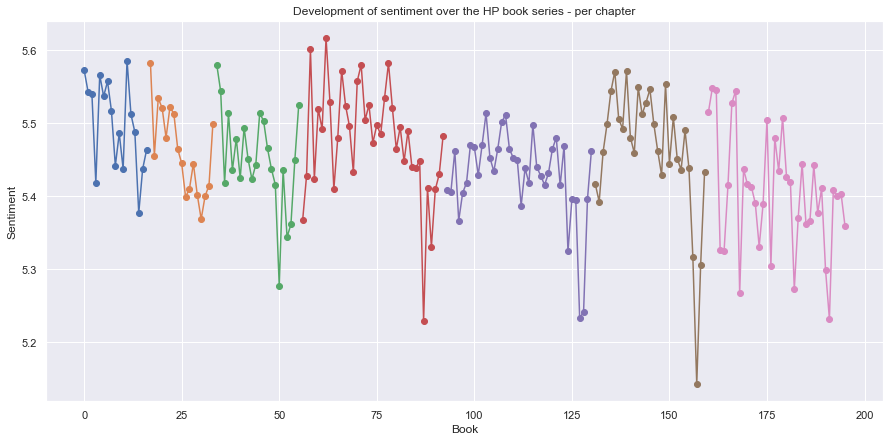

In [540]:
plt.figure(figsize=(15,7))

current_index = 0
palette = itertools.cycle(sns.color_palette())

for book_nr, book in enumerate(books):
    nr_chapters = book['nr_chapters']
    indexes = np.arange(current_index, current_index + nr_chapters)
    values = df['avg_chapter_happiness'][current_index:(current_index+nr_chapters)]
    plt.plot(indexes, values, 'o-', color=next(palette));
    current_index += nr_chapters
    
plt.title('Development of sentiment over the HP book series - per chapter')
plt.xlabel('Book')
#plt.xticks(range(len(books)), names_short, rotation=45, ha="right")  # Set locations and labels

plt.ylabel('Sentiment');

In [542]:
books[5].keys()

dict_keys(['title', 'book_nr', 'nr_chapters', 'chapters', 'all_text', 'all_text_clean', 'all_text_clean_length', 'fdist', 'fdist_norm', 'tf_idf'])

In [545]:
books[5]['chapters'][-3]['chapter_name']

'Flight of the Prince'

#https://harrypotter.fandom.com/wiki/Harry_Potter_and_the_Half-Blood_Prince#Chapter_28:_Flight_of_the_Prince

Released from the spell after Dumbledore's death, Harry pursues Snape through battle in the halls of the school and out onto the grounds. Near the entrance to Hogwarts, Harry attempts to curse Snape, who repels his attacks with ease and reminds the other Death Eaters they are not to harm the boy. When Harry tries one of the Half-Blood Prince's spells, an enraged Snape reveals that the spell is his own. He is the Half-Blood Prince, having taken the title when he was a student as a pun on his mother's maiden name. (Hermione's research later reveals that Snape's father was a Muggle named Tobias Snape and his mother a pureblood witch named Eileen Prince.) Buckbeak the Hippogriff attacks Snape, who leaves Harry behind and escapes with Draco Malfoy. When he returns to Dumbledore's body, Harry finds that the locket was a fake: the real horcrux was already stolen by someone with the initials R.A.B.